In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
#read the dataset
dataset=pd.read_csv('/content/major project dataset.csv')

In [14]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [15]:
#find missing values in dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

<Axes: ylabel='quality'>

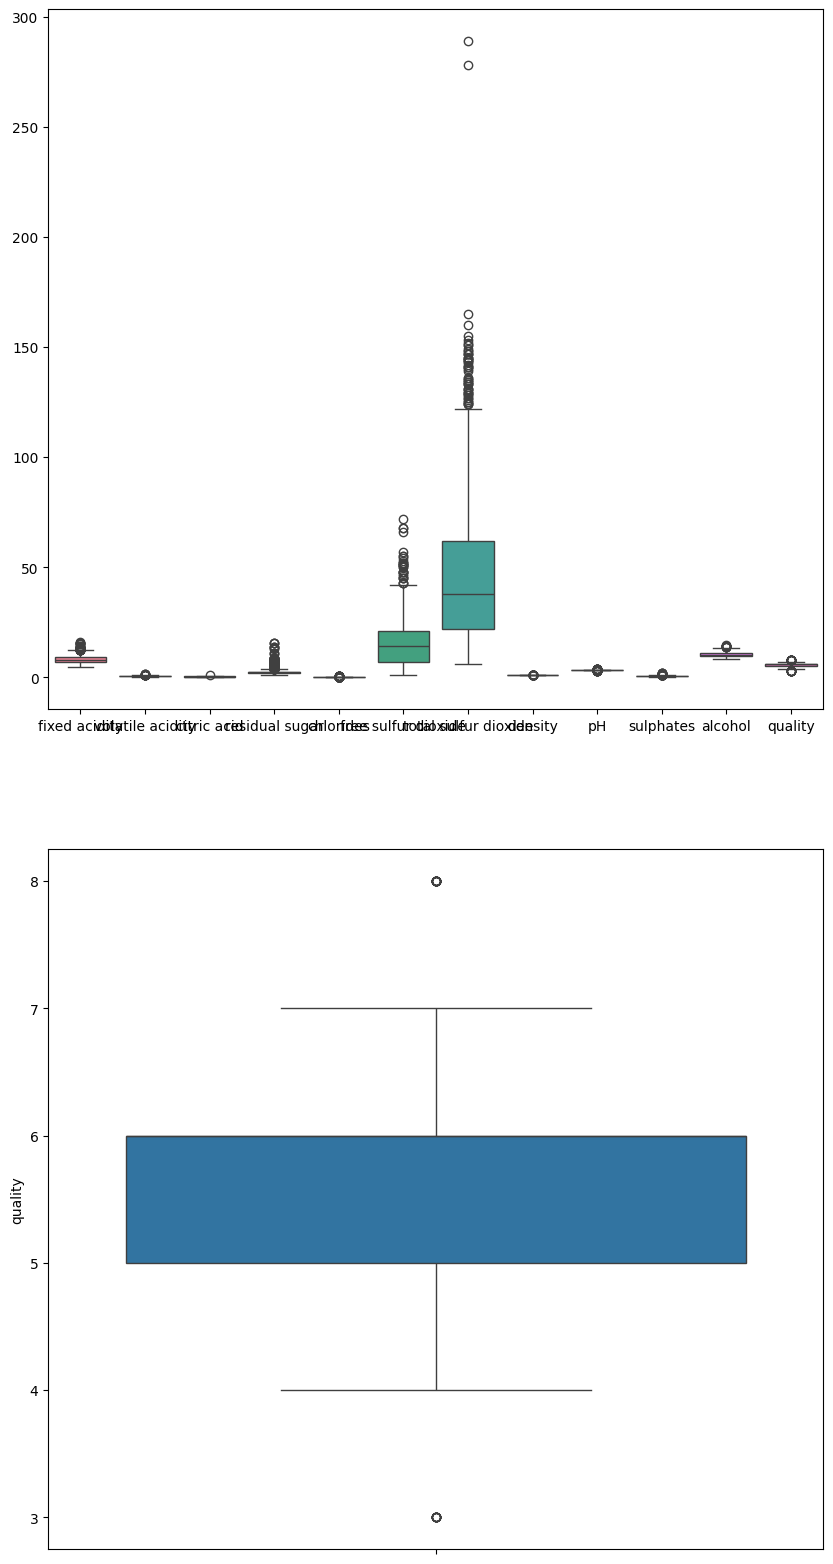

In [16]:
#Distribution of data
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sn.boxplot(data=dataset,orient="v",ax=axes[0])
sn.boxplot(data=dataset, y="quality",orient="pH",ax=axes[1])

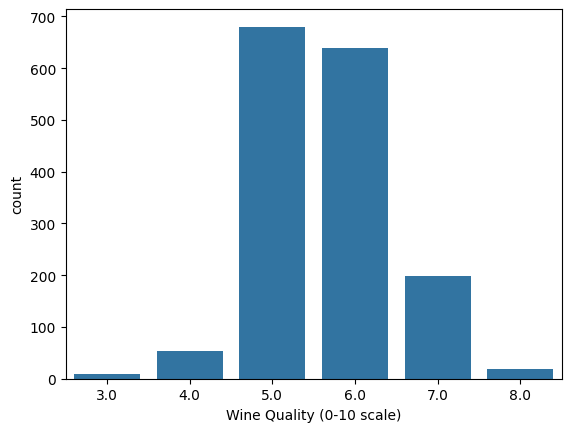

In [17]:
#distribution of class label
sn.countplot(x="quality", data=dataset)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

<Axes: >

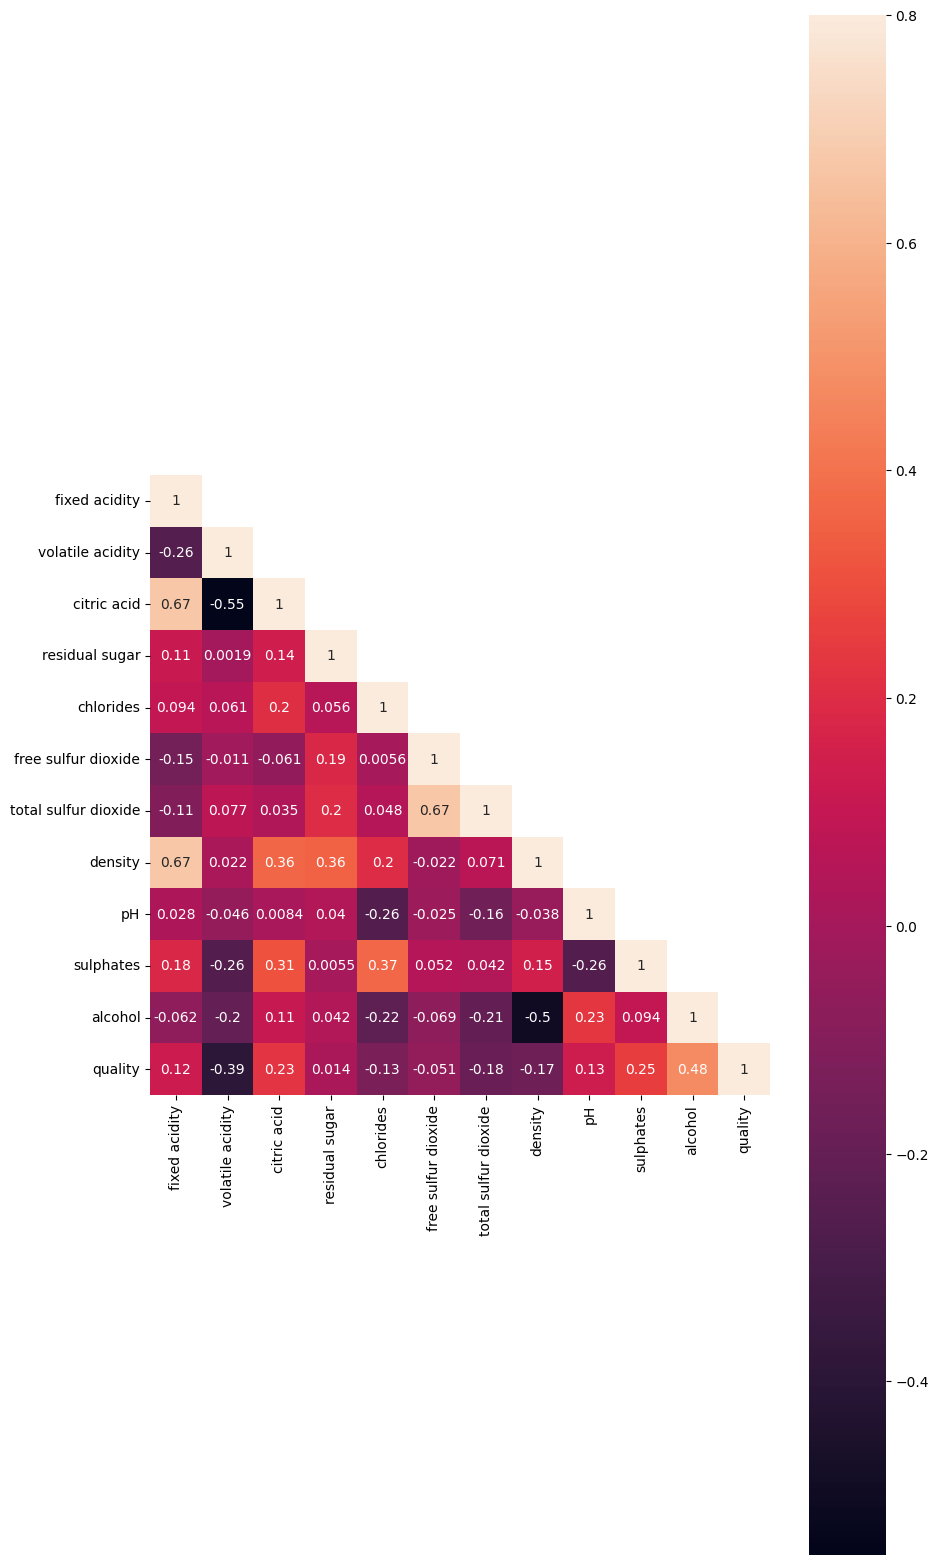

In [18]:
#Correlation analysis
corrMatt=dataset.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,20)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset = pd.DataFrame(imputer.fit_transform(dataset))
#Splitting class label from other features
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

# adding extra column because of Multiple linear regression
X=np.append(arr=np.ones((X.shape[0],1)), values=X, axis=1)

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#Prediction
prediction=regressor.predict(X_test)

In [21]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,5.809361
1,5.045438
2,6.616714
3,5.303290
4,5.991635


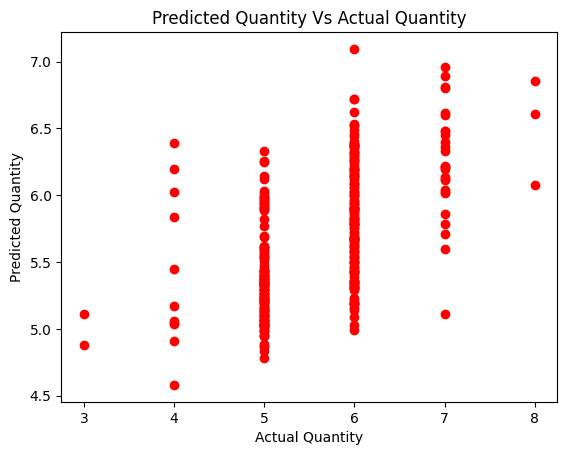

In [22]:
#displaying results
plt.scatter(y_test,prediction, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()